In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')


In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
customer_transactions = transactions.merge(customers, on='CustomerID', how='inner')
product_transactions = transactions.merge(products, on='ProductID', how='inner')
customer_products = customers.merge(products, how='cross')
customer_transactions_products = customer_transactions.merge(products, on='ProductID', how='inner')


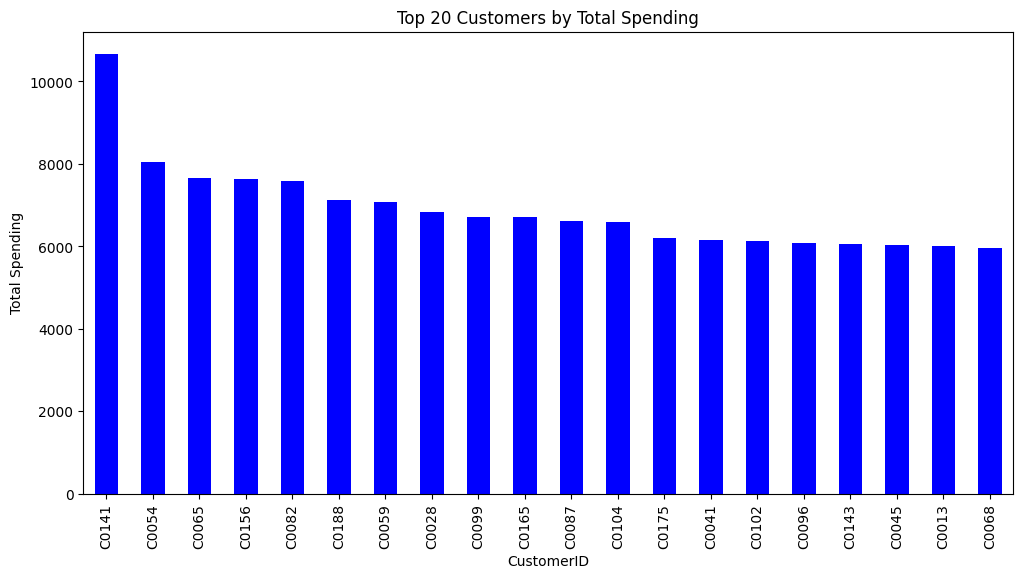

In [ ]:
customer_spending = customer_transactions.groupby('CustomerID')['TotalValue'].sum()
top_customers = customer_spending.nlargest(20)
top_customers.plot(kind='bar', title='Top 20 Customers by Total Spending', color='blue', figsize=(12, 6))
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.show()

#These are the top 20 people who has the most spending on the website generally giving them discounts on products will increase the sale

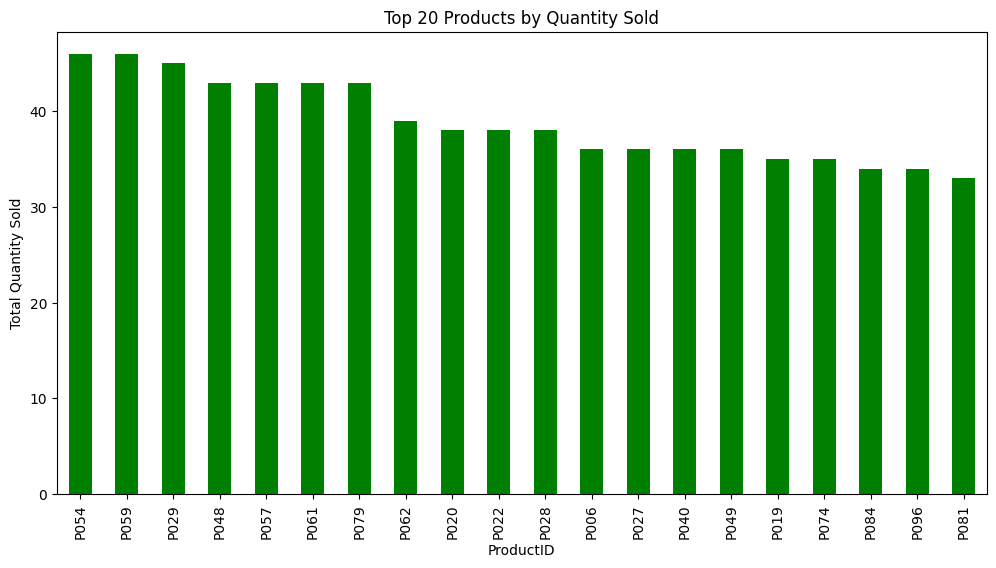

In [ ]:
product_quantity = product_transactions.groupby('ProductID')['Quantity'].sum()
top_products = product_quantity.nlargest(20)
top_products.plot(kind='bar', title='Top 20 Products by Quantity Sold', color='green', figsize=(12, 6))
plt.xlabel('ProductID')
plt.ylabel('Total Quantity Sold')
plt.show()

These are the top 20 most selling products so the marketing strategy used to sell these products can be used for other items too.

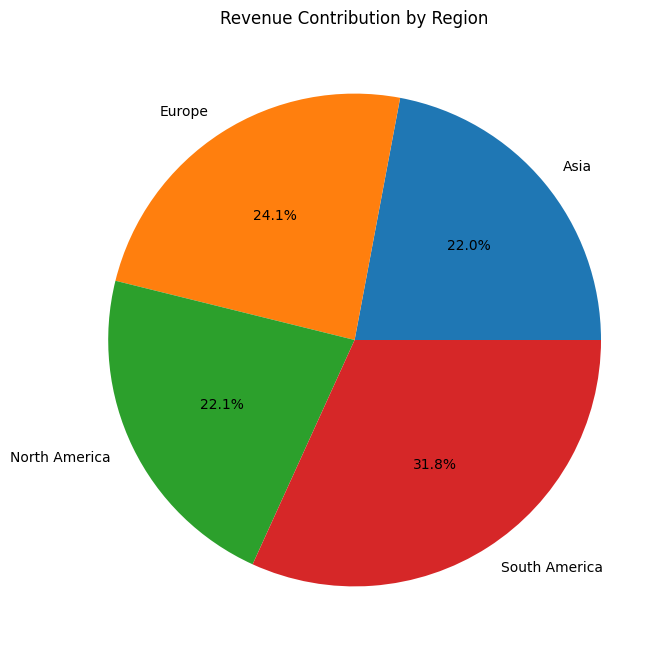

In [ ]:
region_revenue = customer_transactions_products.groupby('Region')['TotalValue'].sum()
region_revenue.plot(kind='pie', autopct='%1.1f%%', title='Revenue Contribution by Region', figsize=(8, 8))
plt.ylabel('')
plt.show()

South America is the main continent where this e-commerce company is working best. Also, Asia is the worst. Though the population of Asia is the largest but we are not able to gnerate as much profit.

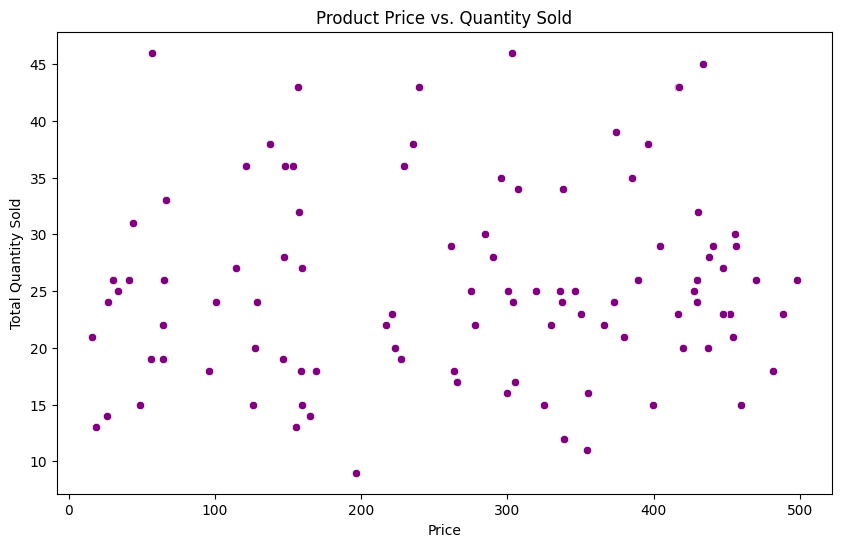

In [ ]:
scatter_data = product_transactions.groupby('ProductID').agg({'Price_x': 'mean', 'Quantity': 'sum'})
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_x', y='Quantity', data=scatter_data, color='purple')
plt.title('Product Price vs. Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Total Quantity Sold')
plt.show()


There is less or zero correlation between the cost and the quantity sold of this price range.

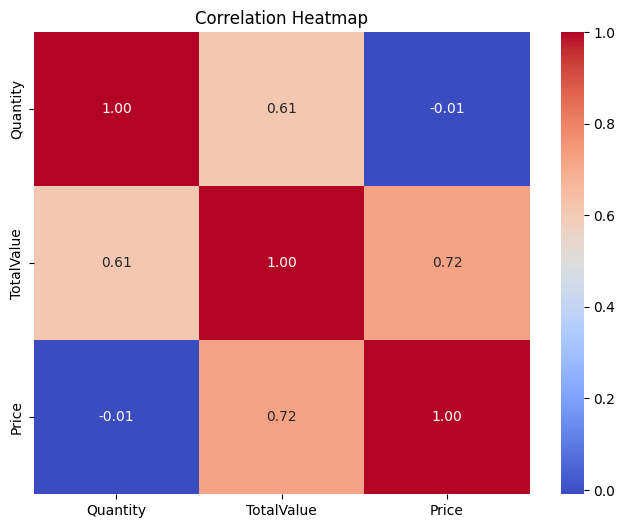

In [ ]:
numeric_data = transactions[['Quantity', 'TotalValue', 'Price']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

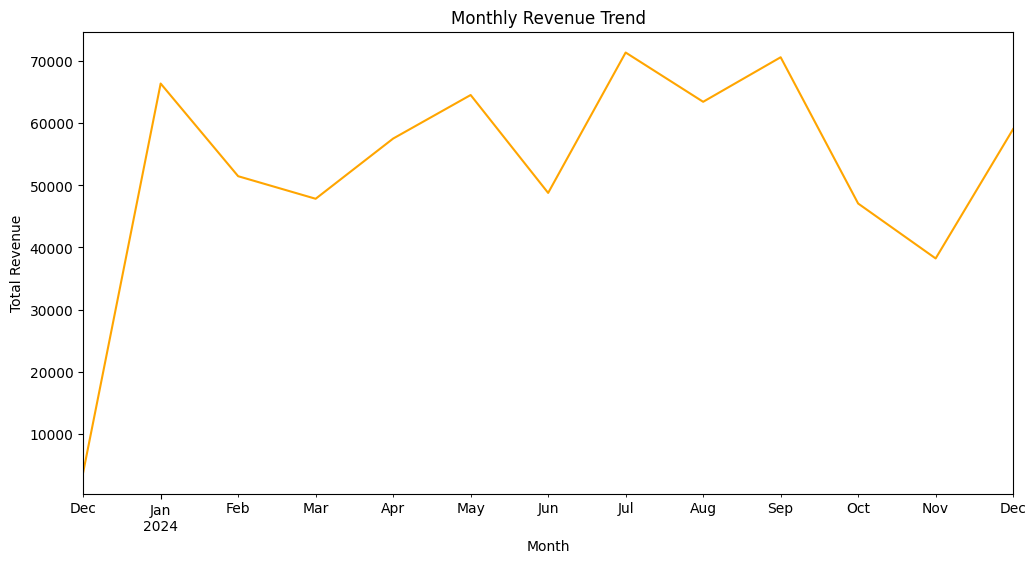

In [ ]:
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('TransactionMonth')['TotalValue'].sum()
monthly_revenue.plot(title='Monthly Revenue Trend', color='orange', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

July is the month where maximum revenue was generated while June, March, October and November saw a significant dip in the revenue.

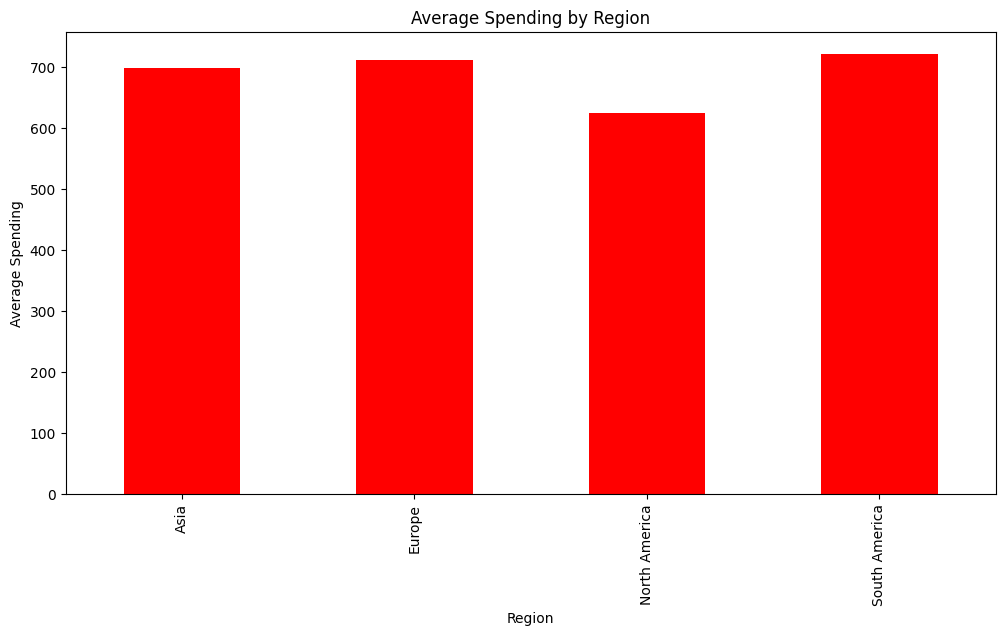

In [ ]:
avg_spending_region = customer_transactions_products.groupby('Region')['TotalValue'].mean()
avg_spending_region.plot(kind='bar', title='Average Spending by Region', color='red', figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Average Spending')
plt.show()

Average spending of the people in South America is the highest.

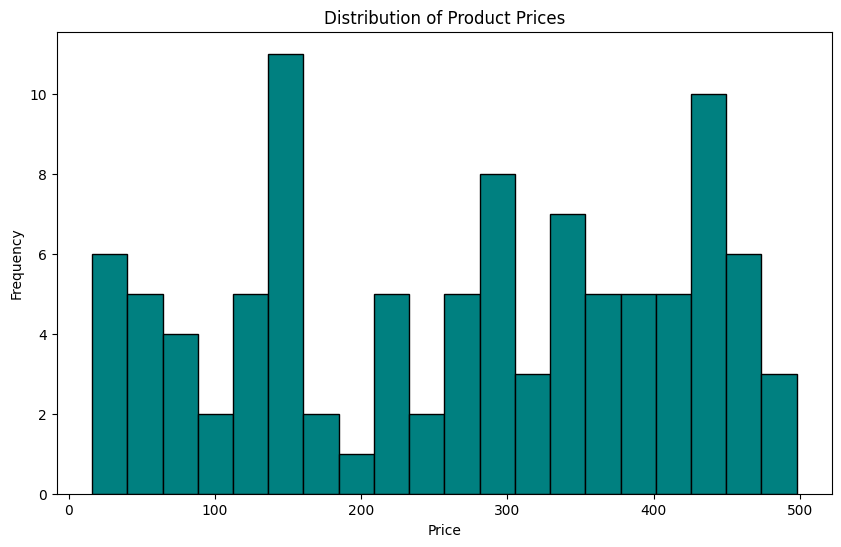

In [ ]:
plt.figure(figsize=(10, 6))
products['Price'].plot(kind='hist', bins=20, color='teal', edgecolor='black', title='Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


<ipython-input-22-f4d919e51914>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=customer_transactions_products, palette='pastel')


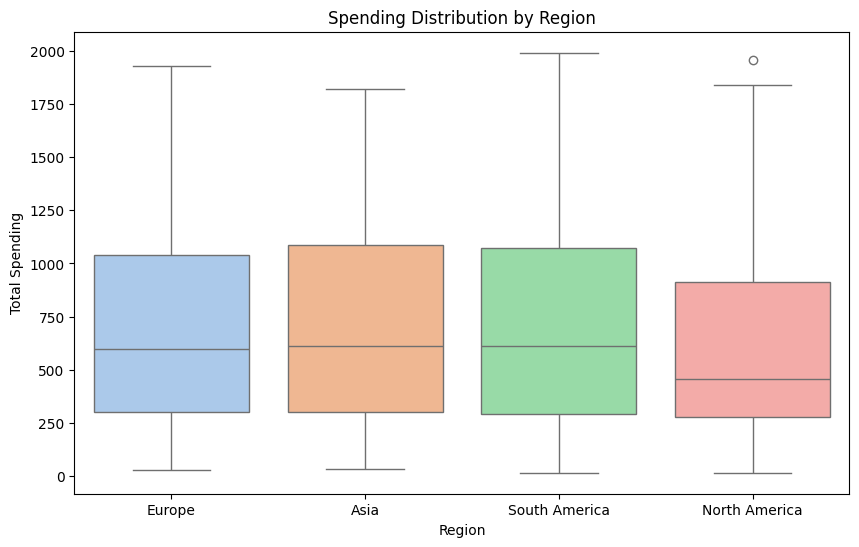

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=customer_transactions_products, palette='pastel')
plt.title('Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

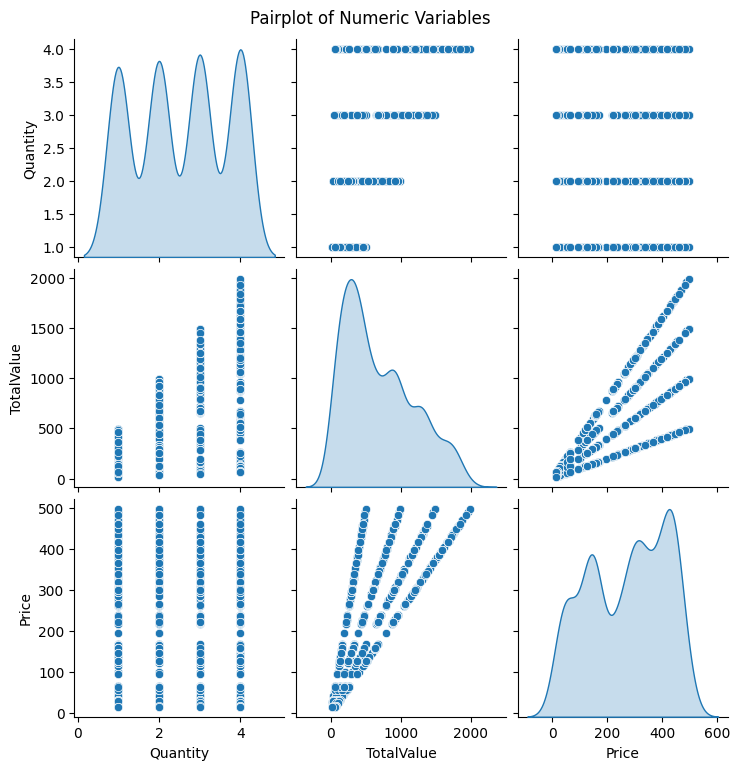

In [ ]:
sns.pairplot(transactions[['Quantity', 'TotalValue', 'Price']], diag_kind='kde', palette='coolwarm')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


<ipython-input-24-9a04208f3025>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_customer_spending, ci=None, estimator=sum, palette='viridis')
<ipython-input-24-9a04208f3025>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='TotalValue', data=region_customer_spending, ci=None, estimator=sum, palette='viridis')


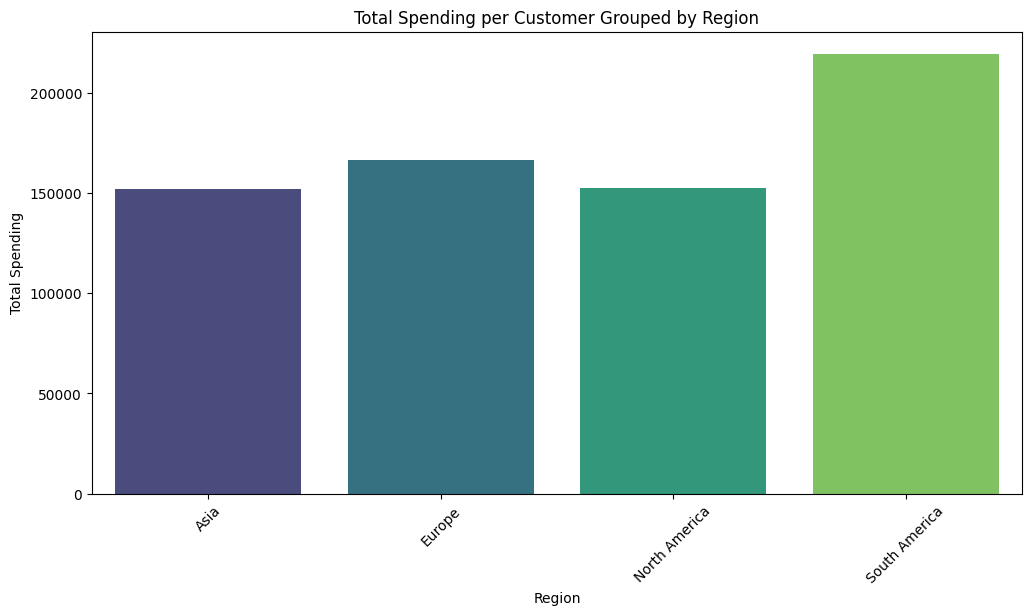

In [24]:
region_customer_spending = customer_transactions.groupby(['Region', 'CustomerID'])['TotalValue'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='TotalValue', data=region_customer_spending, ci=None, estimator=sum, palette='viridis')
plt.title('Total Spending per Customer Grouped by Region')
plt.xlabel('Region')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.show()

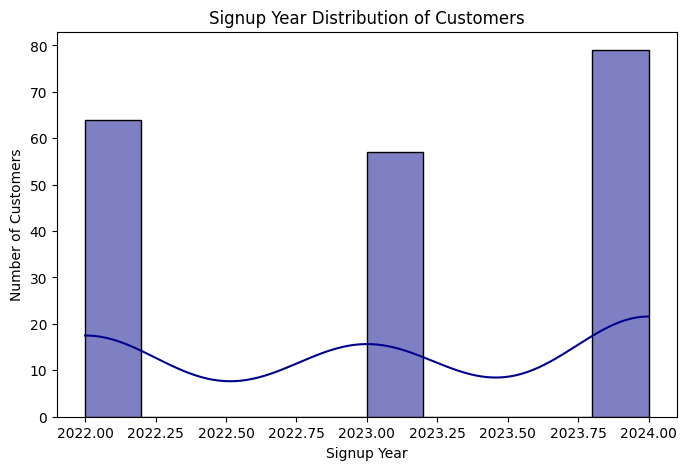

In [25]:
customers['SignupYear'] = customers['SignupDate'].dt.year
plt.figure(figsize=(8, 5))
sns.histplot(customers['SignupYear'], bins=10, kde=True, color='darkblue')
plt.title('Signup Year Distribution of Customers')
plt.xlabel('Signup Year')
plt.ylabel('Number of Customers')
plt.show()

The company has received maximum sigups from the period late 2023 to 2024.